<a href="https://colab.research.google.com/github/Dhathri19/Fourth-Semester-Guide/blob/main/Copy_of_Image_Preprocessing_and_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import os
import random
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/train_new.csv')
df.head()

,image,class
0,a lot8744_frame0.jpg,a lot
1,a lot8744_frame1.jpg,a lot
2,a lot8745_frame0.jpg,a lot
3,a lot8745_frame1.jpg,a lot
4,a lot8745_frame2.jpg,a lot


In [4]:
top = df['class'].value_counts()
ds= pd.DataFrame(top[:20])
ds

,class
cousin,47
thin,45
go,40
interest,39
drink,39
computer,39
cool,39
short,38
shirt,38
thanksgiving,38


In [5]:
import cv2
labels = list(ds.index)
labels

['cousin',
 'thin',
 'go',
 'interest',
 'drink',
 'computer',
 'cool',
 'short',
 'shirt',
 'thanksgiving',
 'trade',
 'who',
 'later',
 'apple',
 'accident',
 'before',
 'tall',
 'man',
 'appointment',
 'change']

In [6]:
import tensorflow as tf
tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/train_small/',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 769 files belonging to 20 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
ds['sign'] = list(ds.index)
ds

,class,sign
cousin,47,cousin
thin,45,thin
go,40,go
interest,39,interest
drink,39,drink
computer,39,computer
cool,39,cool
short,38,short
shirt,38,shirt
thanksgiving,38,thanksgiving


In [8]:
ds.index = pd.to_numeric(ds.index, errors='coerce')
#ds.set_index()
ds

,class,sign
NaN,47,cousin
NaN,45,thin
NaN,40,go
NaN,39,interest
NaN,39,drink
NaN,39,computer
NaN,39,cool
NaN,38,short
NaN,38,shirt
NaN,38,thanksgiving


In [9]:
labels_dict = dict(zip(range(0,20),ds.sign))
labels_dict

{0: 'cousin',
 1: 'thin',
 2: 'go',
 3: 'interest',
 4: 'drink',
 5: 'computer',
 6: 'cool',
 7: 'short',
 8: 'shirt',
 9: 'thanksgiving',
 10: 'trade',
 11: 'who',
 12: 'later',
 13: 'apple',
 14: 'accident',
 15: 'before',
 16: 'tall',
 17: 'man',
 18: 'appointment',
 19: 'change'}

In [10]:
len(labels_dict.values())

20

In [11]:
import pathlib
path = '/content/gdrive/MyDrive/train_small'
sign_images_dict = {}
len_classes = os.listdir(path)
path1 = pathlib.Path(path)
for img in range(len(len_classes)):
    sign_images_dict[img] = list(path1.glob(str(labels_dict[img])+'/*'))
sign_images_dict[0][0]

PosixPath('/content/gdrive/MyDrive/train_small/cousin/cousin112_frame3.jpg')

In [12]:
import numpy as np
x,y=[],[]
for sign_label,images in sign_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(sign_label)
x = np.array(x)
x[0]

array([[[116, 151,  79],
        [116, 151,  79],
        [116, 151,  79],
        ...,
        [106, 149,  74],
        [106, 149,  74],
        [105, 148,  74]],

       [[116, 150,  79],
        [116, 150,  79],
        [116, 150,  79],
        ...,
        [107, 150,  75],
        [105, 148,  73],
        [105, 148,  73]],

       [[116, 150,  79],
        [116, 150,  79],
        [116, 150,  79],
        ...,
        [111, 154,  79],
        [107, 150,  75],
        [106, 149,  74]],

       ...,

       [[ 64, 102,  42],
        [ 64, 102,  42],
        [ 64, 102,  42],
        ...,
        [ 61,  96,  39],
        [ 61,  96,  39],
        [ 61,  96,  39]],

       [[ 64, 102,  42],
        [ 63, 101,  41],
        [ 65, 103,  43],
        ...,
        [ 61,  96,  39],
        [ 61,  96,  39],
        [ 61,  96,  39]],

       [[ 64, 102,  42],
        [ 64, 102,  42],
        [ 64, 103,  43],
        ...,
        [ 61,  96,  39],
        [ 61,  96,  39],
        [ 61,  96,  39]]

In [13]:
x.shape

(769, 224, 224, 3)

In [14]:
y[0]

0

In [15]:
x = x/255.0
x[0]

array([[[0.45490196, 0.59215686, 0.30980392],
        [0.45490196, 0.59215686, 0.30980392],
        [0.45490196, 0.59215686, 0.30980392],
        ...,
        [0.41568627, 0.58431373, 0.29019608],
        [0.41568627, 0.58431373, 0.29019608],
        [0.41176471, 0.58039216, 0.29019608]],

       [[0.45490196, 0.58823529, 0.30980392],
        [0.45490196, 0.58823529, 0.30980392],
        [0.45490196, 0.58823529, 0.30980392],
        ...,
        [0.41960784, 0.58823529, 0.29411765],
        [0.41176471, 0.58039216, 0.28627451],
        [0.41176471, 0.58039216, 0.28627451]],

       [[0.45490196, 0.58823529, 0.30980392],
        [0.45490196, 0.58823529, 0.30980392],
        [0.45490196, 0.58823529, 0.30980392],
        ...,
        [0.43529412, 0.60392157, 0.30980392],
        [0.41960784, 0.58823529, 0.29411765],
        [0.41568627, 0.58431373, 0.29019608]],

       ...,

       [[0.25098039, 0.4       , 0.16470588],
        [0.25098039, 0.4       , 0.16470588],
        [0.25098039, 0

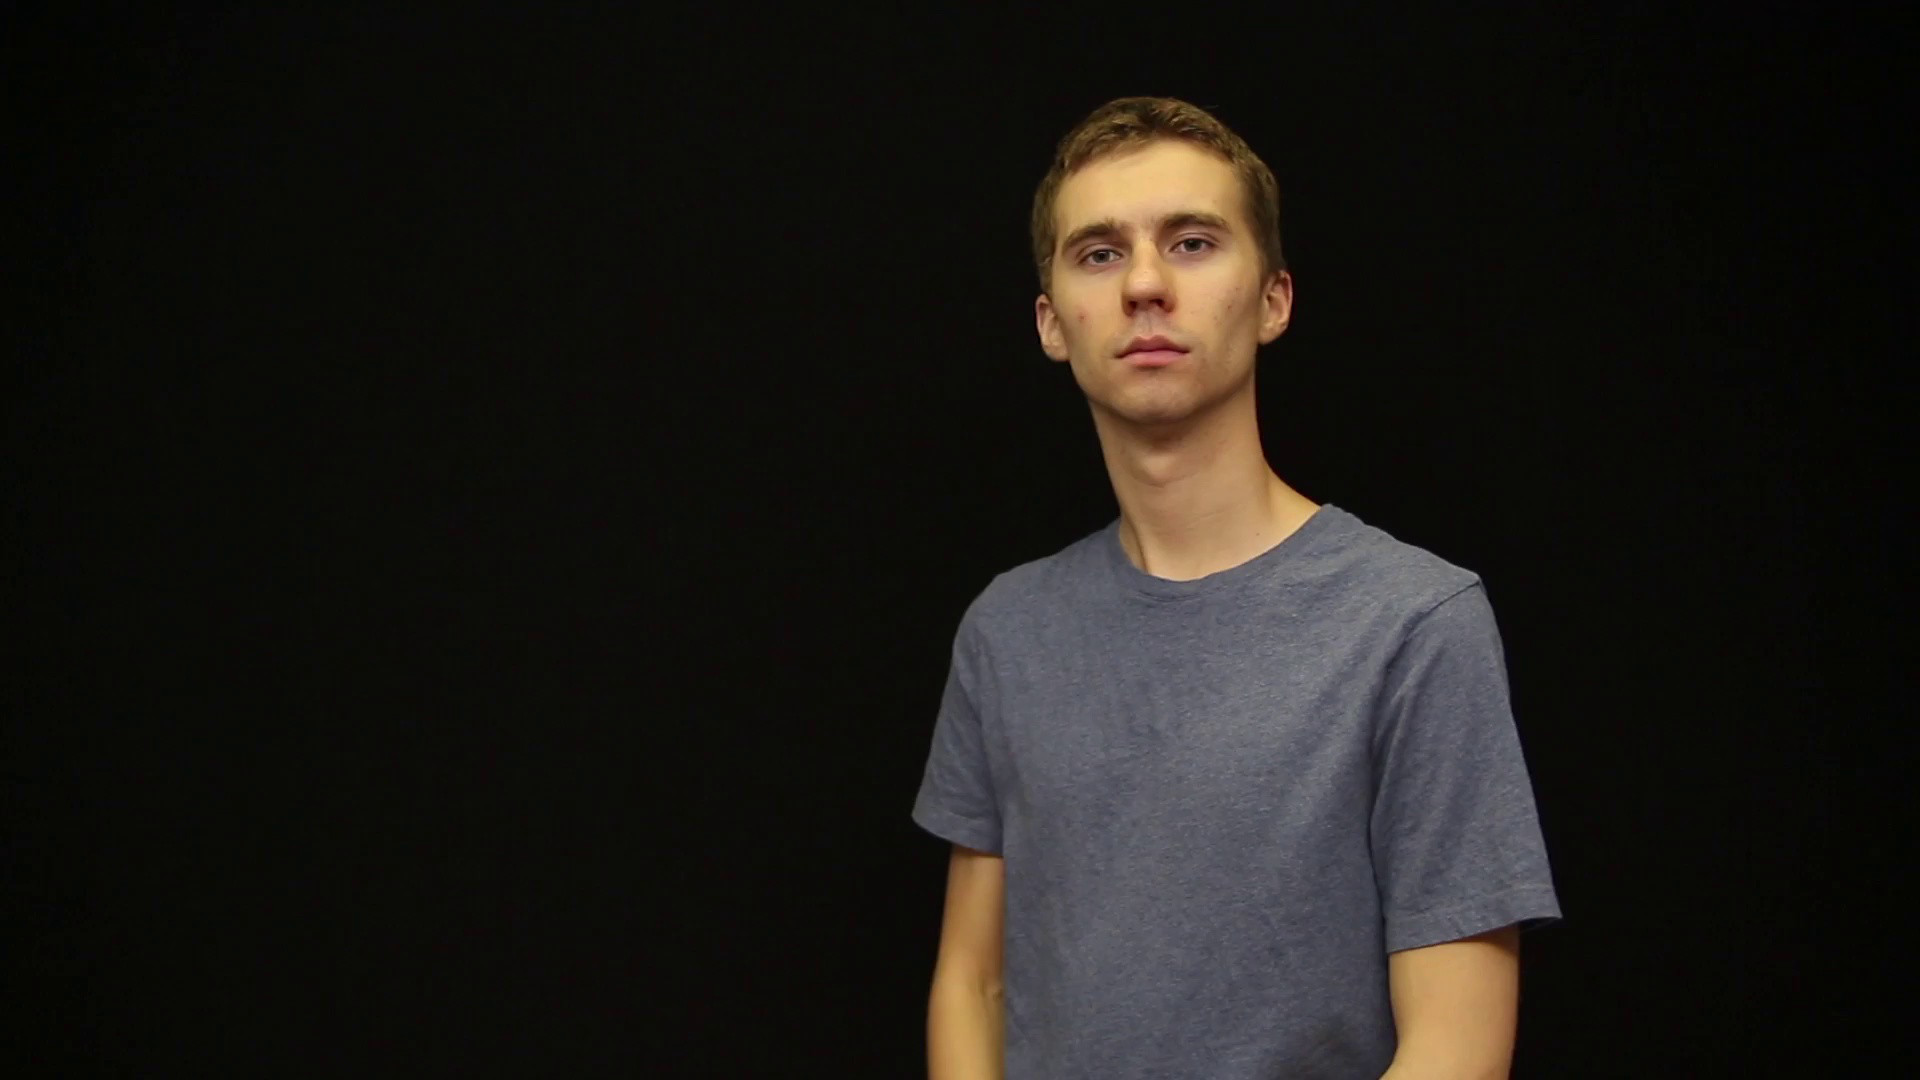

In [16]:
import PIL
PIL.Image.open(str(sign_images_dict[1][19]))

In [17]:
data_dir = '/content/gdrive/MyDrive/train_small/'

In [18]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import splitfolders
input_folder = data_dir

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 769 files [00:01, 462.10 files/s]


In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/output/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 606 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [21]:
class_names = list(labels_dict.values())
print(class_names)

['cousin', 'thin', 'go', 'interest', 'drink', 'computer', 'cool', 'short', 'shirt', 'thanksgiving', 'trade', 'who', 'later', 'apple', 'accident', 'before', 'tall', 'man', 'appointment', 'change']


In [22]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [23]:
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.models import Model
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/output/test/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [24]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
19/19 [==============================] - 31s 791ms/step - loss: 4.3299 - accuracy: 0.1040 - val_loss: 3.4058 - val_accuracy: 0.2400
Epoch 2/10
10/19 [==============>...............] - ETA: 5s - loss: 2.5251 - accuracy: 0.3187

KeyboardInterrupt: ignored

In [25]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

In [27]:
from __future__ import division

import argparse, time, logging, os, sys, math

import numpy as np
import mxnet as mx
import gluoncv as gcv
from mxnet import gluon, nd, init, context
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.data.transforms import video
from gluoncv.data import Kinetics400
from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, LRSequential, LRScheduler, split_and_load, TrainingHistory

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.0+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [25]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [26]:
!pip install gluoncv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 13.0 MB/s 


In [33]:
# number of GPUs to use
num_cpus = 1
ctx = [mx.cpu(i) for i in range(num_cpus)]

# Get the model i3d_inceptionv1_kinetics400 with 400 output classes, without pre-trained weights
net = get_model(name='i3d_inceptionv1_kinetics400', nclass=400)
net.collect_params().reset_ctx(ctx)
print(net)

i3d_inceptionv11_conv0_weight is done with shape:  (64, 3, 7, 7, 7)
i3d_inceptionv11_batchnorm0_gamma is done with shape:  (64,)
i3d_inceptionv11_batchnorm0_beta is done with shape:  (64,)
i3d_inceptionv11_batchnorm0_running_mean is done with shape:  (64,)
i3d_inceptionv11_batchnorm0_running_var is done with shape:  (64,)
i3d_inceptionv11_conv1_weight is done with shape:  (64, 64, 1, 1, 1)
i3d_inceptionv11_batchnorm1_gamma is done with shape:  (64,)
i3d_inceptionv11_batchnorm1_beta is done with shape:  (64,)
i3d_inceptionv11_batchnorm1_running_mean is done with shape:  (64,)
i3d_inceptionv11_batchnorm1_running_var is done with shape:  (64,)
i3d_inceptionv11_conv2_weight is done with shape:  (192, 64, 3, 3, 3)
i3d_inceptionv11_batchnorm2_gamma is done with shape:  (192,)
i3d_inceptionv11_batchnorm2_beta is done with shape:  (192,)
i3d_inceptionv11_batchnorm2_running_mean is done with shape:  (192,)
i3d_inceptionv11_batchnorm2_running_var is done with shape:  (192,)
i3d_inceptionv11_Mixe

In [29]:
!pip install mxnet-cu92

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789.8 MB 13 kB/s 


In [31]:
 transform_train = transforms.Compose([
    # Fix the input video frames size as 256×340 and randomly sample the cropping width and height from
    # {256,224,192,168}. After that, resize the cropped regions to 224 × 224.
    video.VideoMultiScaleCrop(size=(224, 224), scale_ratios=[1.0, 0.875, 0.75, 0.66]),
    # Randomly flip the video frames horizontally
    video.VideoRandomHorizontalFlip(),
    # Transpose the video frames from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    video.VideoToTensor(),
    # Normalize the video frames with mean and standard deviation calculated across all images
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [39]:
# Batch Size for Each GPU
per_device_batch_size = 5
# Number of data loader workers
num_workers = 0
# Calculate effective total batch size
batch_size = per_device_batch_size * num_cpus

# Set train=True for training the model.
# ``new_length`` indicates the number of frames we use as input.
# ``new_step`` indicates we skip one frame to sample the input data.
training_set = Kinetics400(train=True, new_length=32, new_step=2, transform=transform_train)
print('Load %d training samples.' % len(training_set))
train_data = gluon.data.DataLoader(training_set, batch_size=batch_size,
                                   shuffle=True, num_workers=num_workers)

RuntimeError: ignored